# Проект: предсказание уровня удовлетворённости и риска увольнения сотрудника

## Цели: 

### HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

## Задачи:

###  Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 

#### Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

### Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Мини-аннотация

Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


## Загрузка данных 1 задание: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             confusion_matrix, 
                             accuracy_score, 
                             precision_score,
                             recall_score,
                             roc_auc_score,
                             f1_score,
                             make_scorer,
                             roc_curve
                             )
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.impute import SimpleImputer



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier




import seaborn as sns
import math
from sklearn.inspection import permutation_importance


RANDOM_STATE = 77
TEST_SIZE = 0.25

In [2]:
sklearn.__version__

'1.6.1'

In [3]:
dt_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
dt_test = pd.read_csv('/datasets/test_features.csv')
dt_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
dt_train

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [5]:
dt_test

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [6]:
dt_target

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


In [7]:
def data_check(data):
    print(data.shape, '\n')
    print(data.columns, '\n')
    print(data.isna().sum(), '\n')
    print('Кол-во дубликатов: ',data.duplicated().sum(), '\n')
    print(data.info())

In [8]:
data_check(dt_train)

(4000, 10) 

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object') 

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64 

Кол-во дубликатов:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5 

In [9]:
data_check(dt_test)

(2000, 9) 

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object') 

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64 

Кол-во дубликатов:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_yea

In [10]:
data_check(dt_target)

(2000, 2) 

Index(['id', 'job_satisfaction_rate'], dtype='object') 

id                       0
job_satisfaction_rate    0
dtype: int64 

Кол-во дубликатов:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [11]:
for i in ['dept', 'level', 'workload']:
    print(i, dt_train[i].unique(), '\n')
    print(i, dt_test[i].unique(), '\n')

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan] 

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] 

level ['junior' 'middle' 'sinior' nan] 

level ['junior' 'middle' 'sinior' nan] 

workload ['medium' 'high' 'low'] 

workload ['medium' 'low' 'high' ' '] 



In [12]:
dt_test['dept'] = dt_test['dept'].replace(' ', np.nan)
dt_test['workload'] = dt_test['workload'].replace(' ', np.nan)

In [13]:
for i in ['dept', 'level', 'workload']:
    print(i, dt_train[i].unique(), '\n')
    print(i, dt_test[i].unique(), '\n')

dept ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan] 

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan] 

level ['junior' 'middle' 'sinior' nan] 

level ['junior' 'middle' 'sinior' nan] 

workload ['medium' 'high' 'low'] 

workload ['medium' 'low' 'high' nan] 



### Вывод по предобработке данных: 

В таблицах dt_train и dt_test с данными есть пропуски и нет дубликатов, все типы данных корректны и я не стал что-либо менять. Пропуски я заполню в пайплайне. Также я заметил " " в уникальных значениях для dept и workload в dt_test. В пайплайне обработаю это

## Исследовательский анализ данных

In [14]:
def description_for_num_features(model, feature):
    print(model[feature].describe(), type(feature),'\n')
    plt.boxplot(model[feature], vert=False)
    #plt.xlim(0, dt_f_main[feature].describe().max())
    plt.title('График ящик с усами для ' + feature)
    plt.show()
    plt.hist(model[feature], bins=40)
    plt.title('Гистограмма для ' + feature)
    plt.ylabel('Частота')
    plt.xlabel(feature)
    plt.show()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64 <class 'str'> 



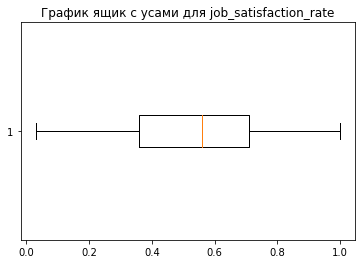

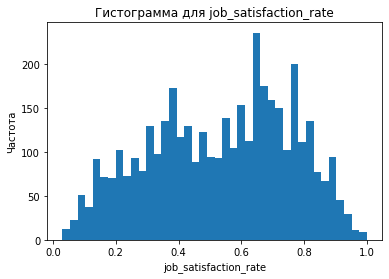

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64 <class 'str'> 



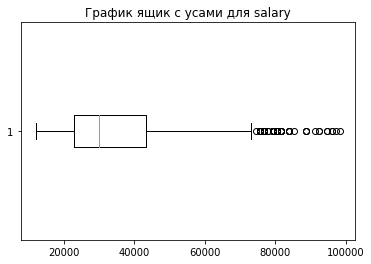

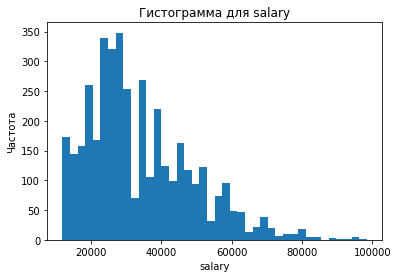

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64 <class 'str'> 



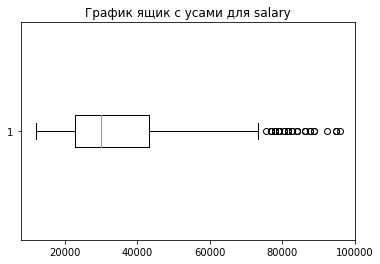

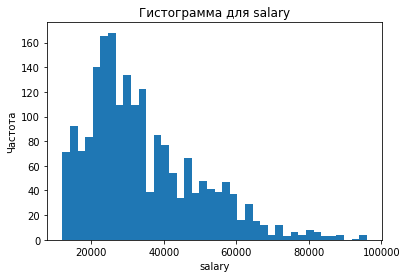

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64 <class 'str'> 



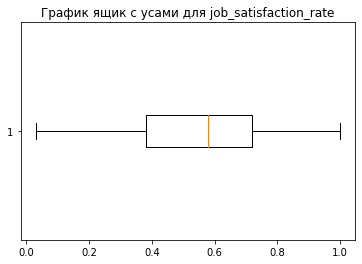

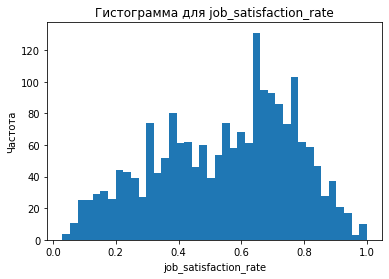

In [15]:
for i in [dt_train, dt_test, dt_target]:
    for j in ['job_satisfaction_rate', 'salary']:
        if (i is dt_test and j == 'job_satisfaction_rate') or (i is dt_target and j == 'salary'):
            continue
        else: 
            description_for_num_features(i, j)


In [16]:
dt_max1 = dt_train.query('salary == @dt_train["salary"].max()')
dt_max1

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
2845,839346,technology,sinior,high,5,no,no,5,98400,0.67


In [17]:
dt_max2 = dt_test.query('salary == @dt_test["salary"].max()')
dt_max2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
793,510806,technology,sinior,high,5,no,no,4,96000


dt_train


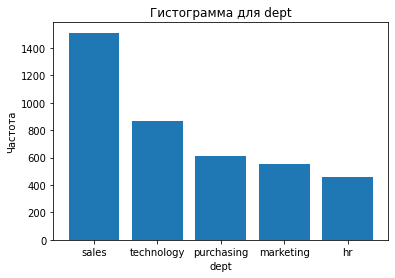

dt_train


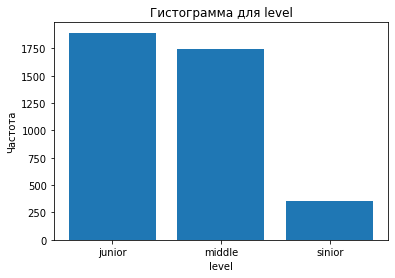

dt_train


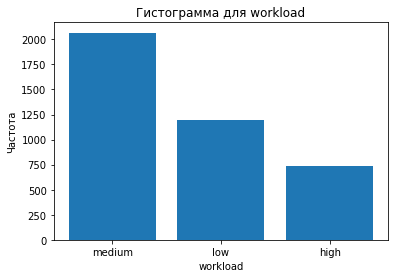

dt_train


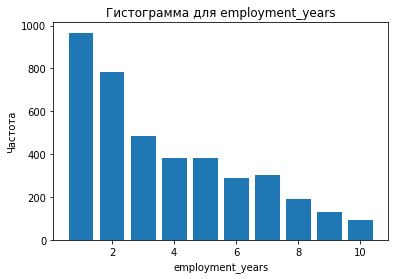

dt_train


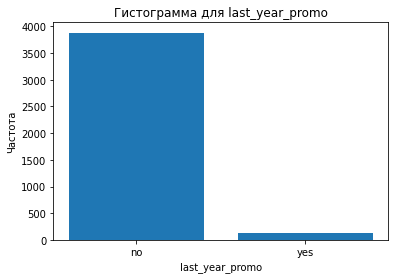

dt_train


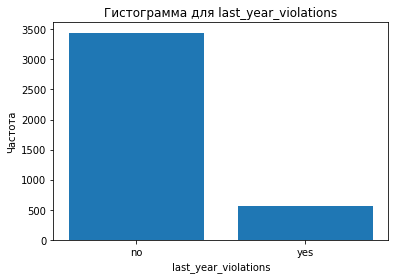

dt_train


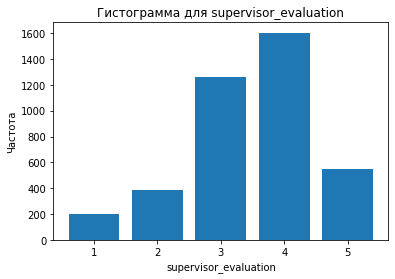

dt_test


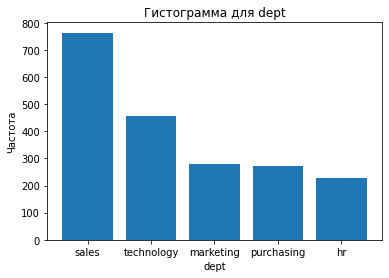

dt_test


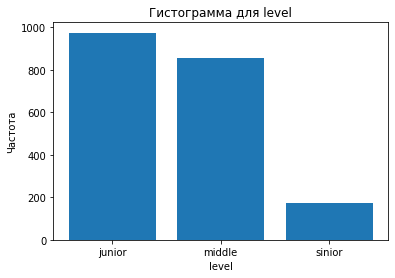

dt_test


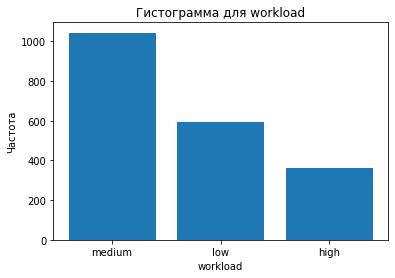

dt_test


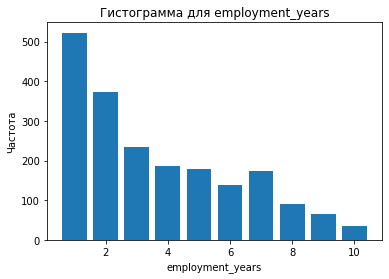

dt_test


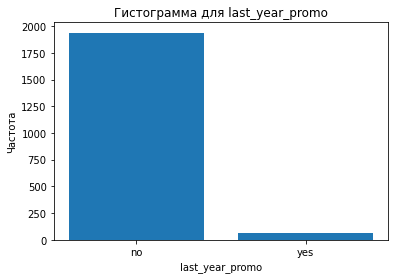

dt_test


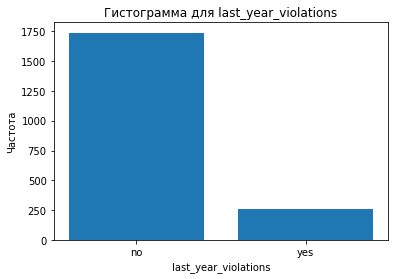

dt_test


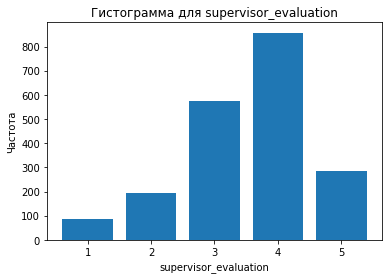

In [18]:
for i in [dt_train, dt_test]:
    for j in i.drop(['id', 'salary'], axis=1).select_dtypes(exclude='float').columns.tolist():
        if i is dt_train:
            print('dt_train')
        else:
            print('dt_test')
        dd = i[j].value_counts()
        plt.bar(x = dd.index, height = dd.values)
        plt.title('Гистограмма для ' + j)
        plt.ylabel('Частота')
        plt.xlabel(j)
        plt.show()
        plt.show()

### Вывод по исследовательскому анализу данных:

Я проверил 2 максимума по зарплатам у dt_train и dt_test, чтобы убедиться нет ли каких-либо отклонений, и обнаружил, что нет: человек имеет уровень sinior(в обоих случаях), 5 лет(в обоих случаях), оценку качества работы в 5 и 4 балла соотв. и не нарушал трудовой договор за последний год. Всё в порядке

Если резюмировать все наблюдения, то можно сказать вот что: наиболее распространённый тип сотрудника компании по опросам - это junior, за ним почти не отстаёт middle, имеющий от 1 до 2 лет опыта работа, работающий в отделе продаж, не получавший премий и не нарушавший трудовой договор за последний год, имеющий оценку качества работы на уровне 4

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Молодец, что все проверил!
</div>

## Подготовка данных

In [19]:
X = dt_train.drop('job_satisfaction_rate', axis=1)
y = dt_train['job_satisfaction_rate']


In [20]:
X

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,155278,sales,junior,medium,2,no,no,1,24000
1,653870,hr,junior,high,2,no,no,5,38400
2,184592,sales,junior,low,1,no,no,2,12000
3,171431,technology,junior,low,4,no,no,2,18000
4,693419,hr,junior,medium,1,no,no,3,22800
...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800
3996,957499,sales,junior,medium,2,no,no,4,21600
3997,533318,sales,middle,low,7,no,no,5,24000
3998,706868,sales,junior,medium,2,no,no,3,24000


In [21]:
ohe_columns = [
    'dept',  
    'last_year_promo', 
    'last_year_violations', 
    'employment_years',
    ]
ord_columns = ['level','workload','supervisor_evaluation']
num_columns = ['salary']

In [22]:
sklearn.__version__

'1.6.1'

In [23]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown ='ignore', sparse_output=False))
    ]
)

In [24]:
for i in ord_columns:
    print(X[i].unique())

['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
[1 5 2 3 4]


In [25]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=
                    [
                        ['junior', 'middle', 'sinior'],
                        ['low', 'medium', 'high'],
                        [1, 2, 3, 4, 5]
                    ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


In [26]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
     
    ]
)

In [27]:
pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

In [28]:
param_grid = [
    {
        'models': [DecisionTreeRegressor()],#random_state=RANDOM_STATE)],
        'models__max_depth': range(2,30),
        'models__max_features': range(2, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Ячейка не выполняется, работа выполнена не полностью, нужно доделать ее полностью</s>
</div>

In [29]:
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations',
                                                   'employment_years']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary'])])),
                ('models', LinearRegression())])

In [30]:
def smape_dt(y_test, y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    tmp = 2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))
    len_ = len(tmp)
    smape = 100 / len_ * np.nansum(tmp)
    return smape

def smape_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    score = smape_dt(y, y_pred)
    return score if score < 16 else np.inf  # Возвращаем бесконечность, если SMAPE >= 15

In [31]:
smape = make_scorer(smape_dt, greater_is_better=False)

In [32]:
rndm = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape,
    n_iter = 20,
    n_jobs=-1
)

In [33]:
rndm.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations',
                                                                                'employment_years']),
                                                                              ('ord',
                                                                               Pipeline...
                   param_distributions=[{'models': [DecisionTreeRegressor()],
                                         'models__max_depth': range(2, 30),
                                         'models__max_features': range(2, 30),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   scoring=make_scorer(smape_dt, greater_is_better=False, response_method='predict'))

In [34]:
print('Лучшая модель и её параметры:\n\n', rndm.best_estimator_)

print ('Метрика лучшей модели на кросс-валидации:', rndm.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations',
                                                   'employment_years']),
                                                 ('ord',
                 

In [35]:
dt_test = dt_test.sort_values(by='id')

In [36]:
dt_target = dt_target.sort_values(by='id')

In [37]:
y_pred = rndm.predict(dt_test)

In [38]:
smape_dt(dt_target['job_satisfaction_rate'], y_pred)

16.095116048265265

## Выводы: 

Первая модель лучше. Для неё требуются гиперпараметры меньше, что уменьшает кол-во вычислительных ресурсов и времени, а также у неё меньше SMAPE

## Загрузка данных 2 задание: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

In [39]:
dt_train_q = pd.read_csv('/datasets/train_quit.csv')
dt_test_f = pd.read_csv('/datasets/test_features.csv')
dt_target_q = pd.read_csv('/datasets/test_target_quit.csv')

In [40]:
dt_train_q

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [41]:
dt_test_f

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [42]:
dt_target_q

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [43]:
def data_check(data):
    print(data.shape, '\n')
    print(data.columns, '\n')
    print(data.isna().sum(), '\n')
    print('Кол-во дубликатов: ',data.duplicated().sum(), 'Кол-во пропусков: ', data.isna().sum().sum(), '\n')
    print(data.info())

In [44]:
data_check(dt_train_q)

(4000, 10) 

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object') 

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64 

Кол-во дубликатов:  0 Кол-во пропусков:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   l

In [45]:
data_check(dt_test_f)

(2000, 9) 

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object') 

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64 

Кол-во дубликатов:  0 Кол-во пропусков:  3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null  

In [46]:
data_check(dt_target_q)

(2000, 2) 

Index(['id', 'quit'], dtype='object') 

id      0
quit    0
dtype: int64 

Кол-во дубликатов:  0 Кол-во пропусков:  0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


In [47]:
for i in ['dept', 'level', 'workload']:
    print(i, dt_train_q[i].unique(), '\n')
    print(i, dt_test_f[i].unique(), '\n')

dept ['sales' 'purchasing' 'marketing' 'technology' 'hr'] 

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '] 

level ['middle' 'junior' 'sinior'] 

level ['junior' 'middle' 'sinior' nan] 

workload ['high' 'medium' 'low'] 

workload ['medium' 'low' 'high' ' '] 



In [48]:
dt_test_f['dept'] = dt_test_f['dept'].replace(' ', np.nan)
dt_test_f['workload'] = dt_test_f['workload'].replace(' ', np.nan)

In [49]:
for i in ['dept', 'level', 'workload']:
    print(i, dt_train_q[i].unique(), '\n')
    print(i, dt_test_f[i].unique(), '\n')

dept ['sales' 'purchasing' 'marketing' 'technology' 'hr'] 

dept ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan] 

level ['middle' 'junior' 'sinior'] 

level ['junior' 'middle' 'sinior' nan] 

workload ['high' 'medium' 'low'] 

workload ['medium' 'low' 'high' nan] 



### Вывод по предобработке данных: 

В таблице dt_test_f с данными есть пропуски, их 3. Во всех таблицах нет дубликатов, все типы данных корректны и я не стал что-либо менять. Пропуски я заполню в пайплайне. Также я заметил " " в уникальных значениях для dept и workload в dt_test_f. В пайплайне обработаю это

## Исследовательский анализ данных

In [50]:
dt_train_q['job_satisfaction_rate'] = dt_train['job_satisfaction_rate']
dt_train_q

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.58
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.76
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.11
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.37
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.20
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.45
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.68
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.76
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.48


In [51]:
dt_train_q.drop(['quit', 'id'], axis=1).columns

Index(['dept', 'level', 'workload', 'employment_years', 'last_year_promo',
       'last_year_violations', 'supervisor_evaluation', 'salary',
       'job_satisfaction_rate'],
      dtype='object')

In [52]:
dt_quit = dt_train_q.pivot_table(
    index=['quit','dept', 'level'], 
    values=['employment_years','salary','supervisor_evaluation', 'job_satisfaction_rate'], 
    aggfunc='median').reset_index()

In [53]:
dt_yes = dt_quit[dt_quit['quit'] == 'yes']
dt_yes

,quit,dept,level,employment_years,job_satisfaction_rate,salary,supervisor_evaluation
15,yes,hr,junior,1.0,0.590,20400,3.0
16,yes,hr,middle,2.0,0.650,24000,3.0
17,yes,hr,sinior,2.0,0.640,60000,3.0
18,yes,marketing,junior,1.0,0.545,24000,3.0
19,yes,marketing,middle,3.5,0.555,27600,3.0
20,yes,marketing,sinior,3.0,0.770,26400,3.0
21,yes,purchasing,junior,1.0,0.570,21600,3.0
22,yes,purchasing,middle,3.0,0.400,34800,3.0
23,yes,purchasing,sinior,3.5,0.535,32400,3.5
24,yes,sales,junior,1.0,0.540,20400,3.0


In [54]:
dt_no = dt_quit[dt_quit['quit'] == 'no'] 
dt_no

,quit,dept,level,employment_years,job_satisfaction_rate,salary,supervisor_evaluation
0,no,hr,junior,2.0,0.500,26400,4.0
1,no,hr,middle,5.0,0.580,40800,3.0
2,no,hr,sinior,6.0,0.645,61200,4.0
3,no,marketing,junior,2.0,0.575,27600,4.0
4,no,marketing,middle,6.0,0.585,40800,4.0
5,no,marketing,sinior,7.0,0.490,68400,4.0
6,no,purchasing,junior,2.0,0.580,25200,4.0
7,no,purchasing,middle,5.0,0.570,38400,3.0
8,no,purchasing,sinior,6.0,0.630,56400,3.0
9,no,sales,junior,2.0,0.530,24000,4.0


In [55]:
dt_quit1 = dt_quit = dt_train_q.pivot_table(
    index=['quit', 'id'], 
    values=['job_satisfaction_rate'], 
    aggfunc='median').reset_index()
dt_yes1 = dt_quit[dt_quit['quit'] == 'yes']
dt_no1 = dt_quit[dt_quit['quit'] == 'no']

Графики для тех, кто ушёл 

count    1128.000000
mean        0.535762
std         0.221366
min         0.030000
25%         0.360000
50%         0.550000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64 <class 'str'> 



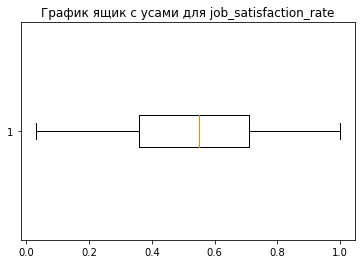

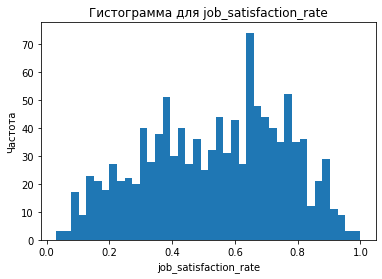

Графики для тех, кто не ушёл 

count    2872.000000
mean        0.533301
std         0.226898
min         0.030000
25%         0.350000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64 <class 'str'> 



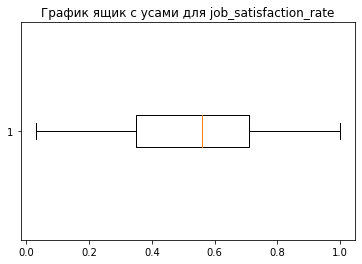

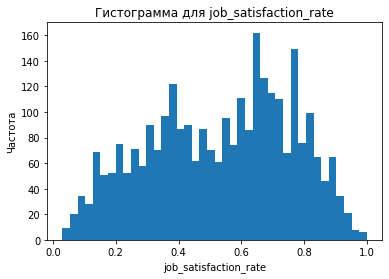

In [56]:
for i in [dt_yes1, dt_no1]:
    if i is dt_yes1:
        print('Графики для тех, кто ушёл \n')
    else:
        print('Графики для тех, кто не ушёл \n')
    description_for_num_features(i, 'job_satisfaction_rate')

###  Вывод по исслед. анализу данных:

Что я сделал:

1) Я взял таблицу dt_train_q и поделил её на 2 сводные таблицы для тех, кто ушёл и не ушёл 2 раза.

2) В первый раз я это сделал, чтобы составить портрет уволившегося сотрудника. Предствавлю его в виде картинки, где расписаны отделы, в которых работали эти сотрудники, их должности, уровень удовл., годы работы, зарплаты и оценки качества работы соотв, слева направо, начиная со столбца dept
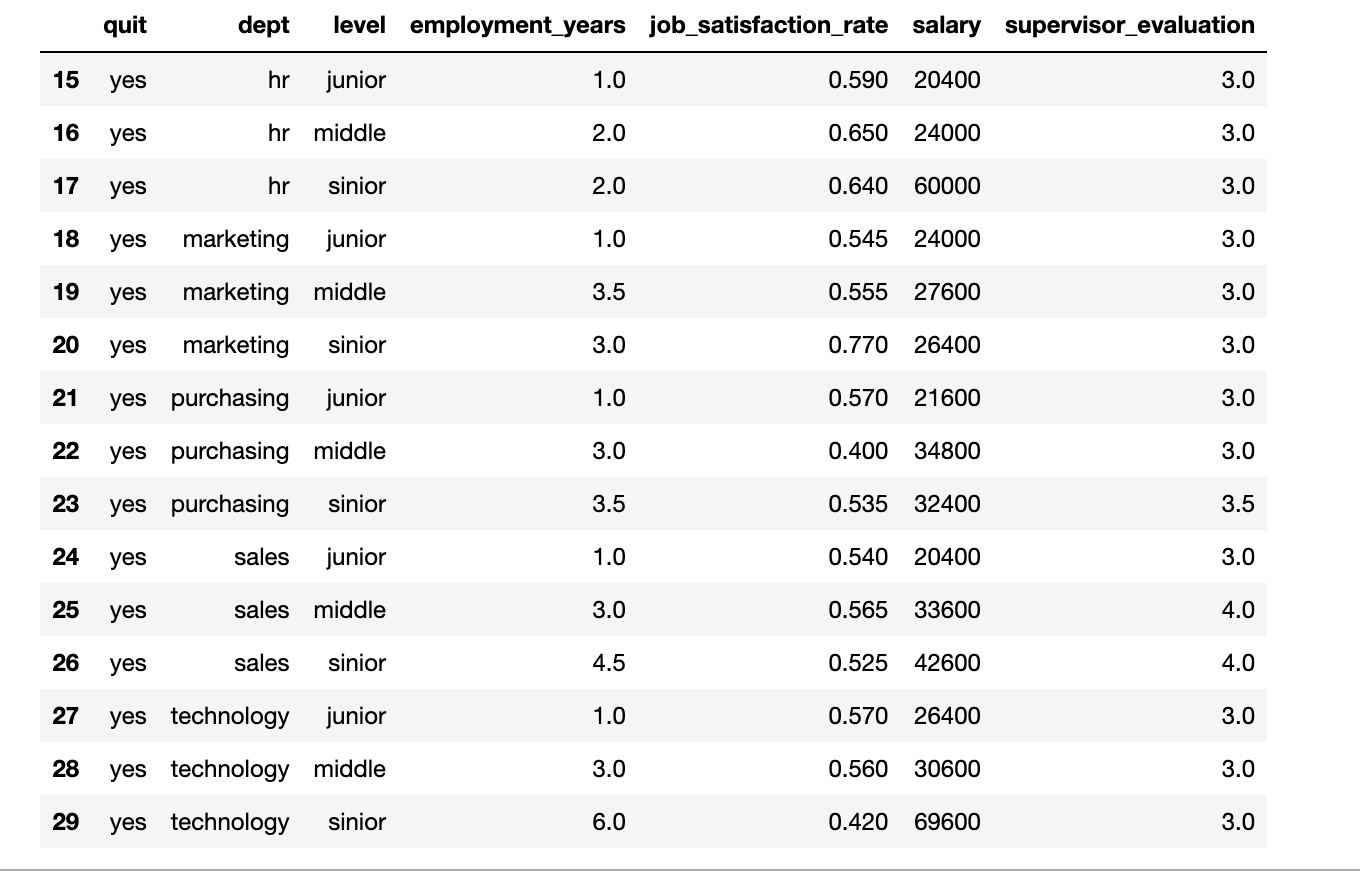

3) Далее я снова разбил основную таблицу на 2 сводные по тому же принципу

4) В этот раз я брал отдельных сотрудников и их уровень удовл., чтобы посмотреть на распределение и проверить гипотизу о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

5) В итоге, оказалось, что нет. По крайней мере, графики не выглядят сильно отличающимися, поэтому могу сделать вывод, что это не так

6) Ещё я добавил в dt_train_q 'job_satisfaction_rate'из dt_train. Если дальше по задаче мне нужно будет добавить предсказанные значения для dt_test и использовать их, то я решил, что нужно и в dt_train для модели ввести их

## Добавление нового входного признака

In [57]:
dt_test_f['job_satisfaction_rate'] = rndm.predict(dt_test_f)

In [58]:
dt_test_f

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.866667
1,686555,hr,junior,medium,1,no,no,4,30000,0.681429
2,467458,sales,middle,low,5,no,no,4,19200,0.657143
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.760000
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.540000
1996,109582,technology,middle,low,3,no,no,2,21600,0.210000
1997,305653,technology,junior,low,1,no,no,3,14400,0.240000
1998,160233,technology,middle,low,8,no,no,1,32400,0.390000


##  Подготовка данных

In [59]:
X = dt_train_q.drop('quit', axis=1)
y = dt_train_q['quit']

In [60]:
y

0        no
1        no
2        no
3       yes
4        no
       ... 
3995     no
3996     no
3997    yes
3998     no
3999    yes
Name: quit, Length: 4000, dtype: object

In [61]:
y.value_counts()

no     2872
yes    1128
Name: quit, dtype: int64

In [62]:
delta = y.value_counts()['no'] - y.value_counts()['yes']
delta

1744

In [63]:
le = LabelEncoder()
y = le.fit_transform(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE,
                                                    stratify = y
)


In [65]:
ohe_columns = [
    'dept',  
    'last_year_promo', 
    'last_year_violations', 
    'employment_years',
    ]
ord_columns = ['level','workload','supervisor_evaluation']
num_columns = ['salary']

In [66]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [67]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=
                    [
                        ['junior', 'middle', 'sinior'],
                        ['low', 'medium', 'high'],
                        [1, 2, 3, 4, 5]
                    
                    ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [68]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns),
    ], 
    remainder='passthrough'
)


In [69]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier())
])

In [70]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(class_weight='balanced')],
        'models__max_depth': range(2,10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            #random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]  
    }

]




In [71]:
rndm1 = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

In [72]:
rndm1.fit(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations',
                                                                          'employment_years'...
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [KNeighborsClassifier()],
                          'models__n_neighbors': range(2, 10),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(penalty='l1',
                                                        solver='liblinear')],
                          'models__C': range(1, 3),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler()]}],
             scoring='roc_auc')

In [73]:
print('Лучшая модель и её параметры:\n\n', rndm1.best_estimator_)

print ('Метрика лучшей модели на кросс-валидации:', rndm1.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations',
                                                   'employment_years']),
              

In [74]:
dt_test_f = dt_test_f.sort_values(by='id')

dt_target_q = dt_target_q.sort_values(by='id')
dt_target_q['quit'] = le.transform(dt_target_q['quit'])

In [75]:
dt_test_f

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1172,100298,hr,junior,low,2,no,no,4,19200,0.820000
852,100480,marketing,junior,low,4,no,no,4,16800,0.841667
848,100503,purchasing,middle,high,5,no,no,4,55200,0.710000
524,100610,sales,middle,medium,5,no,no,4,43200,0.813333
476,100692,sales,middle,high,6,no,no,4,48000,0.697500
...,...,...,...,...,...,...,...,...,...,...
1925,997290,sales,sinior,medium,7,no,no,4,58800,0.790000
1886,998548,marketing,junior,medium,2,no,no,4,32400,0.790000
506,998762,technology,junior,low,3,no,no,3,22800,0.505000
1579,998900,marketing,middle,medium,7,no,no,3,45600,0.430000


In [76]:
dt_target_q['quit']

1566    0
491     0
802     0
725     0
319     0
       ..
1553    0
116     1
731     1
7       0
0       1
Name: quit, Length: 2000, dtype: int64

In [77]:
y_pred = rndm1.predict(dt_test_f)

In [78]:
y_proba = rndm1.predict_proba(dt_test_f)

In [79]:
y_proba

array([[0.72825901, 0.27174099],
       [0.92963286, 0.07036714],
       [0.99702867, 0.00297133],
       ...,
       [0.38910438, 0.61089562],
       [0.99240033, 0.00759967],
       [0.27207024, 0.72792976]])

In [80]:
roc_auc_score(dt_target_q['quit'], y_pred)

0.8251422390801872

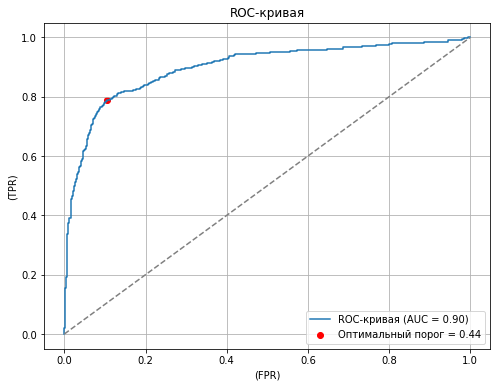

In [81]:
y_proba = rndm1.predict_proba(dt_test_f)[:, 1]

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(dt_target_q['quit'], y_proba)
roc_auc = roc_auc_score(dt_target_q['quit'], y_proba)

# Поиск оптимального порога
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', marker='o', label=f'Оптимальный порог = {optimal_threshold:.2f}')
plt.xlabel('(FPR)')
plt.ylabel('(TPR)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [82]:
y_pred = (y_proba >= optimal_threshold).astype(int)

In [83]:
roc_auc_score(dt_target_q['quit'], y_pred)

0.8415787550129398

## Вывод:

Третья модель лучше. Для неё требуются гиперпараметры больше, но у неё самое больше значение метрики roc-auc.

# Общий вывод


## Задачи: В рамках проекта для компании «Работа с заботой» необходимо разработать две модели машинного обучения. Первая модель будет предсказывать уровень удовлетворённости сотрудников работой, а вторая — вероятность увольнения сотрудников. Эти предсказания помогут бизнесу оптимизировать управление персоналом, снизить отток сотрудников и уменьшить финансовые потери, связанные с внезапными увольнениями.

## Этапы работы: 

### Задача 1: Предсказание уровня удовлетворённости сотрудников

1.1 Загрузка данных:
На первом этапе были импортированы необходимые библиотеки и загружены данные о сотрудниках, включая их характеристики и уровень удовлетворённости.

1.2 Предобработка данных:
Проведена очистка данных: обработаны пропуски, удалены дубликаты и исправлены возможные ошибки.


1.3 Исследовательский анализ данных:
Проведен анализ данных с визуализацией для выявления закономерностей и взаимосвязей.
Использованы статистические методы для анализа распределения уровня удовлетворённости

1.4 Подготовка данных:
Данные были разделены на обучающую и тестовую выборки.
Нормализация и стандартизация числовых признаков были выполнены при необходимости.

1.5 Обучение моделей:

Применены несколько алгоритмов машинного обучения: линейная регрессия и дерева регрессии для предсказания уровня удовлетворённости.
Настройка гиперпараметров моделей проводилась с использованием методов кросс-валидации и RandomizedSearchCV.

1.6 Оформление выводов:
Эффективность моделей была оценена с помощью метрики SMAPE.


### Задача 2: Предсказание увольнения сотрудников

2.1 Загрузка данных:
На этом этапе были загружены данные о сотрудниках и об их увольнении.

2.2 Предобработка данных:
Проведена аналогичная очистка данных, как и в первой задаче.

2.3 Исследовательский анализ данных:
Анализ данных для выявления закономерностей, связанных с увольнением сотрудников, был выполнен с визуализацией.

2.4 Добавление нового входного признака:
На основе проведенного анализа был добавлен новый признак (уровень удовлетворённости), способствующий улучшению предсказаний увольнения.

2.5 Подготовка данных:
Данные были разделены на обучающую и тестовую выборки.
Нормализация и стандартизация числовых признаков также были выполнены.

2.6 Обучение модели:
Применены алгоритмы классификации логистическая регрессия, дерево решений классификации и kNN для предсказания увольнений. Настройка гиперпараметров и кросс-валидация были проведены для повышения точности моделей.

2.7 Выводы:
Эффективность моделей была оценена с использованием метрики ROC-AUC.


## Выводы и дополнительные предложения для бизнеса: 

Разработка моделей предсказания удовлетворённости и увольнений сотрудников позволит компании «Работа с заботой» более эффективно управлять персоналом и создать более здоровую рабочую среду. Рекомендуется регулярное обновление моделей и проведение опросов для сбора актуальных данных, что дополнительно поможет в анализе и улучшении условий труда. 